<div style="direction:rtl;line-height:300%;font-family:BNazanin,">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر فاطمه لشکری
</font>
<p></p>
<br>
<font>
<b>فاز اول پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۸ آبان ۱۴۰۰
<br>
<font size=4.8>
دستیاران آموزشی مربوط به این فاز: سینا کاظمی - پارسا اسکندر
</font>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<h2>
مقدمه
</h2>
<p>
هدف فاز اول پروژه پیاده سازی یک سیستم بازیابی اطلاعات است.
این فاز پروژه از ۴ مرحله تشکیل شده است.
بخش اول به پیش پردازش متنی داده ها می پردازد که شامل نرمال سازی متن (Normalization) ، جداسازی لغات (Tokenization) ، حذف لغات پرتکرار و ... می باشد. بخش دوم مربوط به نمایه سازی (indexing) خواهد بود. در بخش سوم باید روی این نمایه فشرده سازی صورت بگیرد. در بخش چهارم باید پرسمان ورودی کاربر را تصحیح کنید.
</p>
<p>
۲ سری مجموعه دادگان در اختیار شما قرار گرفته است که یکی مربوط به زبان فارسی ( persian_dataset.csv ) و دیگری مربوط به زبان انگلیسی ( english_dataset.csv ) می باشد.
مجموعه فارسی بخشی از مستندات ویکی پدیای فارسی می باشد و مجموعه انگلیسی مربوط به اخبار است.
</p>

</div>

<div dir="rtl">
<h2>
بخش اول ( پیش پردازش اولیه متن )
</h2>
<p>
در این بخش از پروژه باید ابتدا مجموعه فایل هایی که در اختیارتان قرار گرفته است را بخوانید، برای خواندن و کار کردن با فایل‌ها پیشنهاد می‌شود از کتابخانه‌ی 
<a href="https://pandas.pydata.org/">
pandas
</a> 
استفاده کنید.
این کتابخانه توابعی برای 
<a href="https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/">
خواندن
</a> 
و 
<a href="https://towardsdatascience.com/pandas-dataframe-basics-3c16eb35c4f3">
کار کردن
</a> 
راحت‌تر با دیتاها در اختیار شما قرار می‌دهد .


 سپس به ترتیب مراحل پیش پردازش متنی که در ادامه آمده است را روی آنها اعمال کنید. برای کار های پیش رو می توانید از کتابخانه های 
<a href="https://www.nltk.org/">
NLTK
</a>
 برای زبان انگلیسی و هضم ( 
   <a href="http://www.sobhe.ir/hazm/">
hazm
</a> 
 ) برای زبان فارسی استفاده کنید
</p>
<ul>
<li>
نرمال سازی متنی (normalization): برای یکسان سازی متون می توانید از توابع معرفی شده استفاده کنید. اما در صورتی که میخواهید خودتان پیاده سازی کنید باید پیاده 
سازیتان شامل برگرداندن لغات به ریشه (stemming)
، case folding ( برای یکسان سازی متون انگلیسی ) و بقیه موارد مطرح شده در درس باشد.
</li>
<li>
جداسازی (tokenization): برای اینکار میتوانید از کتابخانه های معرفی شده در بالا استفاده نمایید
</li>
<li>
حذف علائم نگارشی: هر متنی در هر زبانی یه سری علائم نگارشی دارد که می بایست حذف شوند مانند: ویرگول ، دونقطه و ...
</li>
<li>
یافتن و حذف لغات پرتکرار (stopwords): در این بخش، حذف درصد معقولی از لغات پرتکرار مورد نظر است. برای این منظور لازم است تا همه متن را پردازش کنید و نسبت به حجم متن، کلماتی که پرتکرار هستند را نمایش دهید. این نسبت را طوری در نظر بگیرید که کلمات پرتکرار به دست آمده تا حد خوبی منطقی و کافی باشند.
</li>
<li>
برگرداندن کلمات به ریشه (stemming, lemmatizing): در نهایت کلمات را به حالت ساده و پایه آنها تبدیل کنید.
</li>
</ul>
<p>
برای پیاده سازی این بخش تابع پیاده سازی prepare_text را پر کنید.
برای نمایش لغات پرتکرار می توانید از هیستوگرام و یا لیست ساده ای از کلمات استفاده کنید.
</p>
</div>

# Prerequisite

Install Libraries

In [ ]:
!pip install nltk
!pip install hazm
!pip install PersianStemmer
!pip install parsivar
!pip install arabic-reshaper
!pip install python-bidi
!pip install unary_coding
!pip install bitstring

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


File Reading & Imports


In [ ]:
import pickle
import string
import nltk
import os
import pandas as pd
import parsivar as prv
from unary_coding import unary, inverted_unary
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from PersianStemmer import PersianStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import RegexpTokenizer
from __future__ import unicode_literals
from hazm import *
import matplotlib.pyplot as plt

farsi_txt = pd.read_csv("/content/drive/MyDrive/MIR/persian_dataset.csv")
farsi_txt.columns = ['title','text']

english_txt = pd.read_csv("/content/drive/MyDrive/MIR/english_dataset.csv")

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')

In [ ]:
print(farsi_txt.info())
print(english_txt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15000 non-null  object
 1   text    15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
dtypes: int64(1), object(2)
memory usage: 148.6+ KB
None


In [ ]:
debug = False
def dprint(*args):
    if debug:
      print(*args, sep="\n")

# Pre-Process Class


In [ ]:
import abc

class Preprocessor(abc.ABC):
    def __init__(self, text_df):
        self.text_df = text_df
        self.punctuation = string.punctuation + "‘’“”–‹›°؟،؛»«"
        self.stop_words = []

    def _remove_punctuation_from_word(self, punctuation, word):
        return ''.join([c for c in word if c != punctuation])

    @abc.abstractmethod
    def basic_text_preprocess(self, raw_text):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """
        pass

    def get_words_frequency(self, limit=50):
        """Return top `limit` words with most frequency 

        Returns
        -------
        list of tuple
            A list of tuples containing tokens and their frequencies
        """

        print("preprocessing title tokens...")
        title_tokens = self.basic_text_preprocess(self.text_df['title'])

        print("preprocessing context tokens...")
        context_tokens = self.basic_text_preprocess(self.text_df['text'])

        print("preprocessing done.")

        all_tokens = pd.concat([title_tokens, context_tokens])

        # find frequency
        freq = nltk.FreqDist()
        all_tokens.apply(lambda text: freq.update(nltk.FreqDist(w for w in text)))

        freqs = freq.most_common()[:limit]

        plt.rcParams['figure.figsize'] = [25, 5]

        labels, values = list(zip(*freqs))
        labels = [get_display(reshape(label)) for label in labels]
        plt.bar(labels, values)
        plt.xticks(rotation=70)
        plt.show()

        return freqs[:limit]


    def get_and_set_stop_words(self, words_frequencies, limit):
        """Return stop words

        Returns
        -------
        dict
            A dictionary of stop words and their frequencies
        """

        most_common = words_frequencies[:limit]
        most_common_dict = {word:freq for word, freq in most_common}
        self.stop_words = most_common_dict.keys()

        return most_common_dict


    def prepare_text(self, raw_text):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization and removing stop words

        Parameters
        ----------
        raw_text : str/pandas.core.series.Series

        Returns
        -------
        list
            A list of tokens
        """
        if (type(raw_text) == str):
          raw_text = pd.DataFrame([raw_text], columns=['text'])['text']

        processed_tokens = self.basic_text_preprocess(raw_text)[0]

        # remove stop words
        final_tokens = [token for token in processed_tokens if token not in self.stop_words]

        return final_tokens

## English Pre-Process

In [ ]:
class EnglishPreprocessor(Preprocessor):
    def _get_wordnet_pos(self, word):
      """Map POS tag to first character lemmatize() accepts"""
      tag = nltk.pos_tag([word])[0][1][0].upper()
      tag_dict = {"J": wordnet.ADJ,
                  "N": wordnet.NOUN,
                  "V": wordnet.VERB,
                  "R": wordnet.ADV}

      return tag_dict.get(tag, wordnet.NOUN)

    def _stem_text(self, stemmer, vocab, text):
        tokens = []
        for word in text:
            stemmed = stemmer.stem(word)
            if stemmed in vocab:
                tokens.append(stemmed)
            else:
                tokens.append(word)
        return tokens

    def basic_text_preprocess(self, raw_text):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """
        dprint("raw_text:", raw_text)

        normalized_text = raw_text.str.lower()
        dprint("normalized_text:", normalized_text)

        #tokenization
        text_tokens = normalized_text.apply(word_tokenize)
        dprint("after tokenization:", text_tokens)

        #delete punctuation
        for p in self.punctuation:
          text_tokens = text_tokens.apply(lambda text: [self._remove_punctuation_from_word(p, word) for word in text])
        text_tokens = text_tokens.apply(lambda text: [word for word in text if word != ''])
        dprint("after deleting punctuation:", text_tokens)

        #stemming
        stemmer = LancasterStemmer()
        vocab = set(words.words())
        text_tokens = text_tokens.apply(lambda text: self._stem_text(stemmer, vocab, text))
        dprint("after stemming:", text_tokens)

        #lemmatizing
        lemmatizer = WordNetLemmatizer()
        text_tokens = text_tokens.apply(lambda text: [lemmatizer.lemmatize(y, self._get_wordnet_pos(y)) for y in text])
        dprint("after lemmatizing:", text_tokens)

        return text_tokens


preprocessing title tokens...
preprocessing context tokens...
preprocessing done.


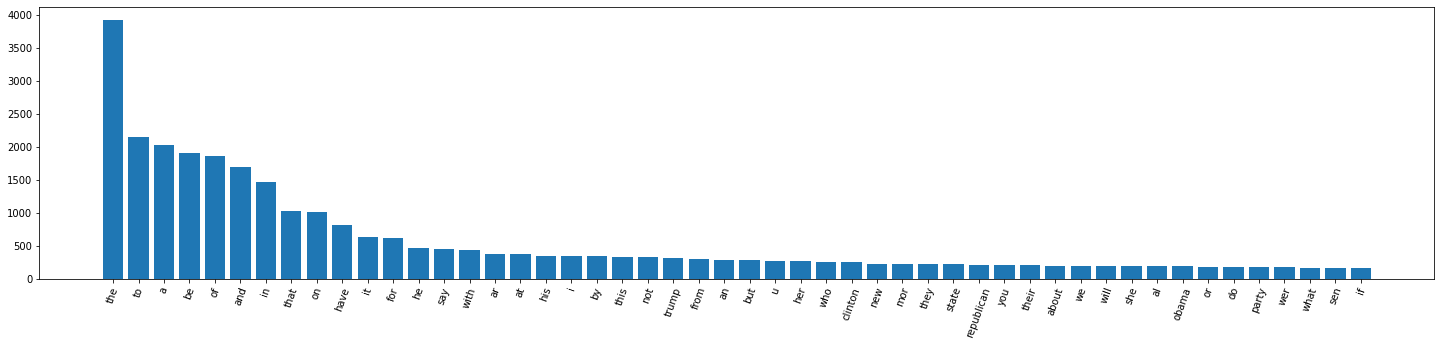

In [ ]:
english_preprocessor = EnglishPreprocessor(english_txt[:100])
english_words_frequencies = english_preprocessor.get_words_frequency()

In [ ]:
english_stop_words_limit = 12
english_stop_words = english_preprocessor.get_and_set_stop_words(english_words_frequencies, english_stop_words_limit)
print("english_stop_words:", english_stop_words)

english_stop_words: {'the': 3929, 'to': 2148, 'a': 2035, 'be': 1916, 'of': 1866, 'and': 1696, 'in': 1474, 'that': 1032, 'on': 1014, 'have': 825, 'it': 641, 'for': 625}


## Persian Pre-Process

In [ ]:
class PersianPreprocessor(Preprocessor):
    def basic_text_preprocess(self, raw_text):
        """Preprocesses the text with tokenization, case folding, stemming and lemmatization

        Parameters
        ----------
        raw_text : df column (pandas.core.series.Series)

        Returns
        -------
        df column
            Tokenized pandas dataframe
        """

        # normalize
        normalizer = prv.Normalizer(statistical_space_correction=True)
        normalized_text = raw_text.apply(normalizer.normalize)
        dprint("normalized_text:", normalized_text)

        # tokenize
        text_tokens = normalized_text.apply(word_tokenize)
        dprint("after tokenization:", text_tokens)

        #delete punctuation
        for p in self.punctuation:
            text_tokens = text_tokens.apply(lambda text: [self._remove_punctuation_from_word(p, word) for word in text])
        text_tokens = text_tokens.apply(lambda text: [word for word in text if word != ''])
        dprint("after deleting punctuation:", text_tokens)

        #lemmatizing
        lemmatizer = Lemmatizer()
        text_tokens = text_tokens.apply(
                lambda text: [lemmatizer.lemmatize(w) for w in text])
        dprint("after lemmatizing:", text_tokens)

        #stemming
        ps = PersianStemmer()
        text_tokens = text_tokens.apply(
                lambda text: [ps.run(w) for w in text])
        dprint("after stemming:", text_tokens)

        return text_tokens


preprocessing title tokens...
preprocessing context tokens...
preprocessing done.


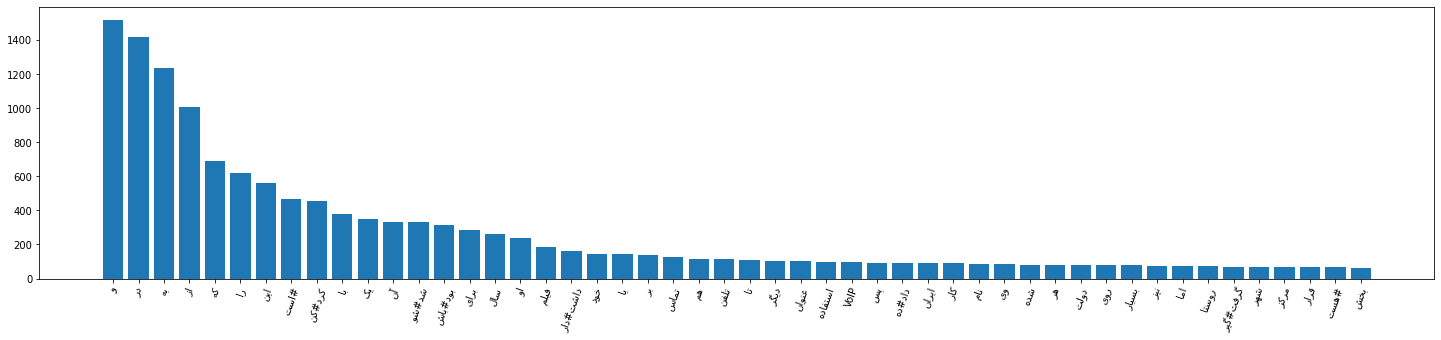

In [ ]:
persian_preprocessor = PersianPreprocessor(farsi_txt[:100])
persian_words_frequencies = persian_preprocessor.get_words_frequency()

In [ ]:
persian_stop_words_limit = 20
persian_stop_words = persian_preprocessor.get_and_set_stop_words(persian_words_frequencies, persian_stop_words_limit)
print("persian_stop_words:", persian_stop_words)

persian_stop_words: {'و': 1519, 'در': 1415, 'به': 1237, 'از': 1009, 'که': 688, 'را': 618, 'این': 561, '#است': 467, 'کرد#کن': 453, 'با': 376, 'یک': 352, 'آن': 331, 'شد#شو': 330, 'بود#باش': 312, 'برای': 287, 'سال': 263, 'او': 237, 'فیلم': 183, 'داشت#دار': 162, 'خود': 142}


In [ ]:
# block for test
print(english_preprocessor.prepare_text('hello chekhabar'))

print(persian_preprocessor.prepare_text('این یک زندگی‌نامه درباره‌ی زندگی رستا روغنی است. وی در سال ۱۲۰۰ متولد شد.'))

['hello', 'chekhabar']
['زندگی نامه', 'درباره', 'زندگی رستا', 'روغن', 'وی', '1200', 'متولد']


<div dir="rtl">
<h2>
توضیحات بخش اول
</h2>
<p>
برای این بخش ما سه کلاس را پیاده‌سازی کردیم. Preprocessor و Persian Preprocessor و English Preprocessor.
<p>
<div1 dir="ltr">

```
Preprocessor
```
</div1>
در این کلاس تمامی توابع لازم برای آماده‌سازی متن قرار داده‌شده‌اند و دو کلاس دیگر از این کلاس ارث‌بری می‌کنند. در ادامه توابع آن را توضیح می‌دهیم:
<p>
<li>
_remove_punctuation_from_word :   این تابع علائم نگارشی انگلیسی و فارسی را از متن حذف می‌کند.
</li>
<li>
basic_text_preprocess : از آنجایی که این تابع در بین پیش‌پردازنده فارسی و انگلیسی تفاوت دارد، در اینجا خالی است و هدف از تعریف آن فقط این بوده که هردو کلاس آن را به ارث ببرند.
</li>
<li>
get_words_frequency : در این تابع ابتدا تمامی عنوان‌ها و متن‌ها tokenize می‌شوند و در یک دیتافریم قرار می‌گیرند. پس آز آن تابع فرکانس کلمات را محاسبه کرده و هیستوگرام آن‌ها را می‌کشد. این کار به این منظور است که بتوانیم تصمیم بگیریم که چه تعدادی از کلمات پرتکرار را از متن‌مان حذف کنیم. طبق شکل اینجا برای متن‌های انگلیسی ۱۲ کلمه‌ی اول و برای متن فارسی ۲۰ کلمه‌ی اول را حذف می‌کنیم.
</li>
<li>
get_and_set_stop_words : در این تابع، محدودیت‌ تعداد stopwordها را مشخص می‌کنیم و تابع get_words_frequency را با آن تعداد صدا می‌زنیم.
</li>
<li>
prepare_text : این تابع به این منظور زده‌شده‌است که در صورتی که ورودی‌مان به‌جای آرایه، به شکل یک رشته بود، آن رشته را نیز به صورت دیتافریم در آورده و تابع basic_text_preprocess را روی آن صدا کرده تا عملیات‌‌های لازم را انجام دهد و در انتها هم stopwordها را از متن پاک کند. به این منظور این مرحله را آخر انجام می‌دهیم چون برای پیدا کردن stopword ها نیاز است که روی آن‌ها نیز عملیات basic_prepare_text انجام شود و متن پردازش شود.
<p>
<div1 dir="ltr">

```
English Preprocessor
```
</div1>

<p> 
همانطور که در قسمت قبلی نیز گفتیم، این کلاس یک تابع basic_text_preprocess دارد که در آن به ترتیب عملیات‌های normalization ، tokenization، حذف علائم نگارشی، stemming و lemmization انجام می‌شوند.
برای stemming از Lancaster استفاده می‌کنیم. در این مرحله برای 
 دقت بیشتر، درصورتیکه با stem کردن به یک کلمه‌ی معنادار نرسیده‌بودیم، کلمه را بدون تغییر نگه می‌داریم.
همچنین برای بخش lemmization، از position tagging  استفاده می‌کنیم. این تابع بررسی می‌کند که نقش هر کلمه در جمله‌مان چیست و با توجه به آن نقش lemmization را انجام می‌دهد.
<p> 
<div1 dir="ltr">

```
Persian Preprocessor
```
</div1>
<p> 
در این کلاس نیز تمامی عملیات‌ها را به ترتیب گفته‌شده در بالا هستند و تنها تفاوت این است که ابتدا lemmization را انجام می‌دهیم و بعد stemming که اینکار برای  بیشتر شدن دقت است. برای stemming از PersianStemmer، برای نرمال‌سازی از parsavir و برای lemmization از hazm استفاده کردیم.
</p>
</div>

<div dir="rtl">
<h2>
بخش دوم ( نمایه سازی )
</h2>
<p>
در این بخش پیاده سازی نمایه جایگاهی (Positional) و نمایه Bigram مطلوب است. برای نمایه جایگاهی باید به ازای هر لغت، لیستی از اسناد شامل آن لغت و جایگاه (ها) هر لغت در آن سند داشته باشید و برای نمایه Bigram نیز ترکیب های دوحرفی تمامی کلمات موجود در لغت نامه که این ترکیب در آنها موجود است را ذخیره کنید. این نمایه برای اصلاح پرسمان مورد استفاده قرار خواهد گرفت. نمایه شما باید پویا باشد یعنی با حذف سند از نمایه نیز حذف شود و با اضافه کردن سند یا اسناد در طول اجرای برنامه به نمایه اضافه شود. همچنین بعد از نمایه سازی باید قادر باشید نمایه را در فایلی ذخیره کرده و از آن بخوانید. پویا بودن نمایه و ذخیره سازی آن را برای هردو نوع نمایه در نظر بگیرید.
</p>
<p>
نکات پیاده سازی:
</br>
برای سادگی پیاده سازی برای هر کارکرد خواسته شده در توضیحات بالا یک تابع پیاده سازی کنید. برای مثال دوتابع برای حذف و اضافه سند به نمایه و توابعی برای ذخیره سازی و بارگزاری نمایه ها و ... در نظر بگیرید.
</p>

</div>

# Indexing

## Positional Index

In [ ]:
class TermInDocPositionalInfo:
    def __init__(self):
        self.frequency = 0
        self.positions = []


class TermPositionalInfo:
    def __init__(self):
        self.total_frequency = 0
        self.docs_list = {}


class PositionalIndexDictionary():
    def __init__(self, preprocessor):
        self.terms_dictionary = {}
        self.preprocessor = preprocessor

    def print(self, start=0, end=10):
        for term, term_info in list(self.terms_dictionary.items())[start: end]:
            print(f"\n\"{term}\":")
            print(f"total frequency: {term_info.total_frequency}")
            for doc_id, doc_info in term_info.docs_list.items():
                print(f"\t{doc_id},{doc_info.frequency}", doc_info.positions)

    def add_new_doc(self, doc_id, raw_text):
        """Add new doc terms to dictionary

        Parameters
        ----------
        doc_id: doc_id
        raw_text : str

        """

        terms = self.preprocessor.prepare_text(raw_text)
        for pos, term in enumerate(terms):
            # add term to dictionary if not exist
            if term not in self.terms_dictionary:
                self.terms_dictionary[term] = TermPositionalInfo()

            # add doc to term info dictionary if not exist
            if doc_id not in self.terms_dictionary[term].docs_list:
                self.terms_dictionary[term].docs_list[doc_id] = TermInDocPositionalInfo(
                )

            # update term statistic
            term_info = self.terms_dictionary[term]
            term_info.total_frequency += 1
            term_info.docs_list[doc_id].frequency += 1

            # add position to list
            term_info.docs_list[doc_id].positions.append(pos)

    def remove_doc(self, doc_id, raw_text):
        """Remove doc terms from dictionary

        Parameters
        ----------
        doc_id: doc_id
        raw_text : str

        """

        terms = prepare_text(raw_text)
        for pos, term in enumerate(terms):
            if term not in self.terms_dictionary:
                raise Exception()

            if doc_id not in self.terms_dictionary[term].docs_list:
                raise Exception()

            # update term statistic
            term_info = self.terms_dictionary[term]
            term_info.total_frequency -= 1
            term_info.docs_list[doc_id].frequency -= 1

            # remove position from list
            term_info.docs_list[doc_id].positions.remove(pos)

    def get_gaps(self):
        docs = {}
        gaps = {}
        for term, term_info in self.terms_dictionary.items():
            docs[term] = []
            for doc_id, doc_info in term_info.docs_list.items():
                docs[term].append(doc_id)
            docs[term] = sorted(docs[term])
            docs[term].insert(0, 0)
            
            gaps[term] = [docs[term][i]-docs[term][i-1]
                          for i in range(1, len(docs[term]))]
        return gaps


In [ ]:
english_positional_index_dictionary = PositionalIndexDictionary(english_preprocessor)

english_txt[:10].apply(lambda row : english_positional_index_dictionary.add_new_doc(row.name, row['title'] + " " + row['text']), axis=1)

english_positional_index_dictionary.print(start=0, end=5)


"you":
total frequency: 11
	0,6 [0, 226, 242, 684, 723, 727]
	3,1 [10]
	4,1 [132]
	6,2 [229, 365]
	8,1 [1497]

"can":
total frequency: 9
	0,3 [1, 685, 887]
	2,1 [130]
	4,1 [186]
	8,4 [472, 1044, 1580, 1597]

"smell":
total frequency: 2
	0,2 [2, 686]

"hillary":
total frequency: 29
	0,19 [3, 22, 53, 77, 89, 137, 151, 300, 308, 327, 402, 420, 434, 443, 500, 580, 592, 735, 854]
	3,5 [65, 128, 146, 213, 270]
	4,4 [12, 203, 209, 214]
	8,1 [6]

"fear":
total frequency: 11
	0,7 [4, 568, 645, 649, 653, 687, 871]
	5,3 [779, 843, 1063]
	9,1 [249]


In [ ]:
english_positional_index_dictionary.get_gaps()

{'you': [0, 3, 1, 2, 2],
 'can': [0, 2, 2, 4],
 'smell': [0],
 'hillary': [0, 3, 1, 4],
 'fear': [0, 5, 4],
 'daniel': [0],
 'greenfield': [0],
 'shillman': [0],
 'journalism': [0],
 'fellow': [0, 5],
 'at': [0, 1, 1, 1, 2, 1, 1, 1, 1],
 'freedom': [0, 5],
 'cent': [0, 5, 3],
 'new': [0, 1, 1, 1, 1, 1, 3, 1],
 'york': [0, 3, 1, 1, 3, 1],
 'writ': [0, 3],
 'focus': [0, 5],
 'rad': [0, 8],
 'islam': [0, 5],
 'fin': [0, 5, 1, 2, 1],
 'stretch': [0],
 'elect': [0, 1, 2, 1, 4],
 'rodham': [0],
 'clinton': [0, 3, 1, 4],
 'gon': [0, 8, 1],
 'war': [0, 5, 3],
 'with': [0, 1, 1, 1, 1, 1, 1, 2, 1],
 'fbi': [0],
 'word': [0, 5, 3],
 'unprecedented': [0],
 'thrown': [0, 5],
 'around': [0, 5, 4],
 'so': [0, 3, 2, 3],
 'oft': [0, 5, 1],
 'this': [0, 1, 1, 1, 1, 1, 1, 2, 1],
 'ought': [0],
 'retire': [0],
 'but': [0, 2, 2, 1, 3, 1],
 'still': [0, 5, 1, 2, 1],
 'nominee': [0, 3, 1, 4],
 'major': [0],
 'political': [0, 1],
 'party': [0, 1, 2, 2],
 'go': [0, 1, 1, 3, 1, 2],
 'exact': [0, 1],
 'what': [0

In [ ]:
persian_positional_index_dictionary = PositionalIndexDictionary(persian_preprocessor)

farsi_txt[:10].apply(lambda row : persian_positional_index_dictionary.add_new_doc(row.name, row['title'] + " " + row['text']), axis=1)

persian_positional_index_dictionary.print(start=0, end=5)


"رفتار":
total frequency: 28
	0,28 [0, 1, 9, 20, 43, 56, 73, 80, 103, 114, 144, 149, 157, 168, 179, 185, 197, 299, 439, 548, 726, 764, 776, 799, 900, 905, 1077, 1100]

"پاسخ":
total frequency: 4
	0,3 [2, 268, 275]
	7,1 [173]

"ارگانیسم":
total frequency: 1
	0,1 [3]

"انگیزه":
total frequency: 1
	0,1 [4]

"بیرونی":
total frequency: 2
	0,2 [5, 15]


In [ ]:
persian_positional_index_dictionary.get_gaps()

{'#هست': [0, 5, 2],
 '0': [7],
 '1': [7],
 '12': [5],
 '1311': [9],
 '1351': [5],
 '1363': [5],
 '1380': [1],
 '1385': [9],
 '1387': [5],
 '1388': [5],
 '14': [7],
 '1832': [3],
 '1963': [2],
 '2': [7],
 '20': [0, 7],
 '21': [7],
 '25': [5],
 '28': [5],
 '3': [7],
 '300': [2],
 '310': [8],
 '65': [1, 7],
 '8324': [9],
 'Anchises': [6],
 'G': [7],
 'G باشد': [7],
 'G باشند': [7],
 'H': [7],
 'He': [7],
 'Hg': [7],
 'Hgبا': [7],
 'Z': [7],
 'a': [7],
 'bG': [7],
 'bH': [7],
 'eH': [7],
 'formula': [7],
 'g': [7],
 'gG': [7],
 'gH': [7],
 'i': [7],
 'آخرین': [0],
 'آدم': [0],
 'آذربایجان': [4],
 'آرش': [5],
 'آسیب': [0],
 'آسیب پذیر': [0],
 'آشکار': [0],
 'آغاز': [0],
 'آغوش': [0],
 'آفرودیته': [6],
 'آلمریای': [8],
 'آلن': [2],
 'آمادگی': [0],
 'آمار': [9],
 'آمد#آ': [0, 6],
 'آمدن': [0],
 'آمریکا': [5],
 'آنخیسس آنخیسس': [6],
 'آنروز': [0],
 'آنشیز': [6],
 'آنچه': [0],
 'آنکه': [0],
 'آنگونه': [0],
 'آهنگساز': [5],
 'آورد#آور': [0, 5],
 'آوردن': [0],
 'آیا': [7],
 'آینده': [0],
 'آینیاس

## Bigram Index

In [ ]:
class BigramInfo:
    def __init__(self):
        self.terms = {}


class BigramIndexDictionary():
    def __init__(self, preprocessor):
        self.bigram_dictionary = {}
        self.preprocessor = preprocessor

    @property
    def flat_bigram_dictionary(self):
      flat_dict = {key: [term for term in val.terms.keys()] for key, val in self.bigram_dictionary.items()}
      return flat_dict

    def print(self, start=0, end=10):
        for bigram, info in list(self.bigram_dictionary.items())[start: end]:
            print(f"\n\"{bigram}\":")
            for term, freq in info.terms.items():
                print(f"({term},{freq})", end=" ")

    def add_new_doc(self, raw_text):
        """Add new doc terms to dictionary

        Parameters
        ----------
        raw_text : str

        """
        terms = self.preprocessor.prepare_text(raw_text)
        for term in terms:
            augmented_term = "$" + term + "$"
            for i in range(len(augmented_term) - 1):
                bigram = augmented_term[i:i + 2]

                # add bigram to dictionary if not exist
                if bigram not in self.bigram_dictionary:
                    self.bigram_dictionary[bigram] = BigramInfo()

                # add term to bigram list if not exist
                if term not in self.bigram_dictionary[bigram].terms:
                    self.bigram_dictionary[bigram].terms[term] = 0

                # update term statistic
                self.bigram_dictionary[bigram].terms[term] += 1

                # print(bigram, term)
                # self.print(start=0, end=2)

    def remove_doc(self, raw_text):
        """Remove doc terms from dictionary

        Parameters
        ----------
        raw_text : str

        """

        terms = self.preprocessor.prepare_text(raw_text)
        for term in terms:
            augmented_term = "$" + term + "$"
            for i in range(len(augmented_term) - 1):
                bigram = augmented_term[i:i + 2]

                if bigram not in self.bigram_dictionary:
                    raise Exception()

                # add term to bigram list if not exist
                if term not in self.bigram_dictionary[bigram].terms:
                    raise Exception()

                # update term statistic
                self.bigram_dictionary[bigram].terms[term] -= 1
                if self.bigram_dictionary[bigram].terms[term] == 0:
                    del self.bigram_dictionary[bigram].terms[term]

    def get_gaps(self):
        docs = {}
        gaps = {}
        for term, term_info in self.bigram_dictionary.items():
            docs[term] = set()
            for vocab, doc_id in term_info.terms.items():
                docs[term].add(doc_id)
            docs[term] = list(sorted(docs[term]))
            docs[term].insert(0, 0)
            
            gaps[term] = [docs[term][i]-docs[term][i-1]
                          for i in range(1, len(docs[term]))]
        return gaps


    def get_bigrams(self, term):
        augmented_term = "$" + term + "$"
        bigrams = [augmented_term[i:i + 2] for i in range(len(augmented_term) - 1)]
        return bigrams
      
    def get_bigrams_count(self, term):
        return len(self.get_bigrams(term))
    
    def get_terms_with_common_bigrams(self, query, minimum_common_bigrams = 1):
        query_bigrams = self.get_bigrams(query)
        terms = {}
        for bigram in query_bigrams:
            if bigram not in self.bigram_dictionary:
                continue
            bigram_term_list = self.bigram_dictionary[bigram].terms
            for term in bigram_term_list:
                if term not in terms:
                    terms[term] = 0
                terms[term] += 1

        return {term:count for term,count in terms.items() if count >= minimum_common_bigrams}
   

In [ ]:
english_bigram_index_dictionary = BigramIndexDictionary(english_preprocessor)

english_txt[:10].apply(lambda row : english_bigram_index_dictionary.add_new_doc(row['title'] + " " + row['text']), axis=1)

english_bigram_index_dictionary.print(start=0, end=10)


"$y":
(you,11) (york,13) (yo,3) (year,17) (yvoe,1) (yet,3) (young,4) (yell,1) (yus,1) (yale,8) (yearold,1) (youngster,1) (yeah,1) (youtube,1) 
"yo":
(you,11) (york,13) (everyone,2) (yo,3) (cokhyouusrfs,1) (young,4) (anyone,1) (youngster,1) (youtube,1) 
"ou":
(you,11) (journalism,1) (around,6) (ought,1) (hour,3) (would,25) (wouldnt,1) (found,9) (spout,1) (outdone,1) (house,6) (thought,3) (countless,2) (out,17) (enough,8) (could,17) (about,24) (country,18) (outcome,1) (without,5) (throughout,4) (wound,1) (through,9) (numerous,1) (delicious,1) (course,4) (announce,1) (aboutface,1) (previously,1) (couldnt,2) (courage,1) (rough,1) (doubt,1) (our,25) (shouldnt,1) (outspoken,1) (contentious,1) (account,2) (cokhyouusrfs,1) (preposterous,1) (couldve,1) (young,4) (sought,3) (outsider,1) (religious,1) (sound,2) (pound,1) (outside,3) (courtyard,6) (group,3) (ground,1) (shout,1) (scout,1) (should,6) (proud,1) (tremendously,1) (soul,2) (countryman,1) (couple,1) (seriously,1) (thousand,1) (although,

In [ ]:
persian_bigram_index_dictionary = BigramIndexDictionary(persian_preprocessor)

farsi_txt[:10].apply(lambda row : persian_bigram_index_dictionary.add_new_doc(row['title'] + " " + row['text']), axis=1)

persian_bigram_index_dictionary.print(start=0, end=10)


"$ر":
(رفتار,28) (روی,9) (رفته,1) (روانشناسی,7) (روان,2) (رویه,2) (روش,3) (رفتارگرایی,3) (روانکاو,1) (روز,1) (راز,1) (رابطه,14) (رفت#رو,7) (رقابت,3) (راتسهیل,1) (راتقلید,1) (راه,1) (رضا,1) (رغبت,1) (راضی کننده,1) (رسید#رس,1) (رتبه,1) (رسیدن,1) (رفیع,1) (راحت تر باکسی دعواکنید,1) (راحت,1) (رضایت,1) (رشته,4) (روستا,1) (روم,1) (راست,13) (رابطه formula,2) (راست همنهشتی,4) (رده,1) 
"رف":
(رفتار,28) (فرو رفته,1) (رفته,1) (گرفت#گیر,8) (رفتارگرایی,3) (اعلامیه رفتارگرا,1) (حرف,1) (صرف,2) (رفت#رو,7) (گرفته شود,1) (رفیع,1) (پذیرفت#پذیر,1) (گرفتار,1) 
"فت":
(رفتار,28) (فرو رفته,1) (رفته,1) (گرفت#گیر,8) (یافته,1) (رفتارگرایی,3) (یافتهبود,1) (اعلامیه رفتارگرا,1) (گفت#گو,8) (رفت#رو,7) (گرفته شود,1) (صفت,2) (مخالفت,1) (عقب افتاده,1) (پذیرفت#پذیر,1) (افتاد#افت,2) (هفتگی,1) (گرفتار,1) 
"تا":
(رفتار,28) (تا,7) (تابع,3) (رفتارگرایی,3) (گشتالت,1) (اعلامیه رفتارگرا,1) (تاثیر,2) (ایستاد#ایست,2) (پرتاب,1) (کودکستان,1) (دوستانه,2) (استادانه,1) (عقب افتاده,1) (قبرستان,1) (افتاد#افت,1) (روستا,1) (استان,3) (دهست

<div dir="rtl">
<h2>
بخش سوم ( فشرده سازی نمایه ها)
</h2>
در این بخش هدف، فشرده‌سازی نمایه‌های ساخته‌شده به دو روش 
variable code 
و
gamma code 
است.

<h3>
نکات پیاده‌سازی 
</h3>
 هر دو روش پیاده‌سازی شود ولی برای ذخیره‌سازی نمایه‌ها در فایل و استفاده‌ از آن در بخش‌های بعد یکی از دو روش به دلخواه استفاده شود.
 <br>
برای ذخیره نمایه در فایل می‌توانید از JSON 
یا
pickle 
استفاده کنید.
</div>


# Compression

<div dir="rtl">
<h1>توضیحات</h1>

برای پیاده‌سازی این بخش ابتدا در دو قسمت Variable Code و Gamme Code،  
توابع لازم برای تبدیل id داک‌‌ها به بایت را آماده سازی می‌کنیم و سپس توابع خواندن و نوشتن را وارد می‌کنیم.

\
از آنجایی که در هر دو روش VB و Gamma آرایه‌ای از اعداد به عنوان ورودی داده خواهد شد (آرایه gap)، توابع در این دو بخش باید بتوانند یک آرایه از اعداد را گرفته و پس از آماده‌کردن خروجی به شکل bytes، مجددا آن را به آرایه اولیه تبدیل کنند. دلیل استفاده از bytes نیز حجم کمتر آن نسبت به ذخیره‌سازی اعداد است.

\
<h2>
Variable Byte
</h2>
توابع پیاده سازی شده در این بخش عبارتند از:

<div1 dir="ltr">

```
VB_encode_number(n)
```
</div1>

در روش VB Encoding، برای هر عدد مقدار خاصی تولید می‌شود. بنابراین این تابع مقدار یک عدد را به عنوان ورودی می‌گیرد (int) و مقدار خروجی آن را به صورت bytes برمی‌گرداند.

<div1 dir="ltr">

```
ٰVB_decode_number(bytes_n)
```
</div1>

عملکرد این تابع معکوس تابع بالاست، یعنی با ورودی گرفتن bytes و با فرض اینکه مقدار ورودی به یک عدد اختصاص دارد، عدد مورد نظر را تولید می‌کند.

<div1 dir="ltr">

```
VB_encode_array(list_n)
```
</div1>

در این تابع، آرایه‌ای از اعداد به ورودی داده می‌شود و پس از انجام VB encoding برای هر یک از اعداد به طور جداگانه، bytes های خروجی آنها در کنار هم قرار می‌گیرند تا در نهایت یک خروجی تولید شود. 

<div1 dir="ltr">

```
VB_decode_array(bytes_n)
```
</div1>

با ورودی دادن bytesی که نشان‌دهنده یک آرایه از اعداد است، این تابع می‌تواند آرایه اولیه را بازگرداند


\
<h2>
Gamma
</h2>

در این بخش داریم:

<div1 dir="ltr">

```
bit_division(num)
```
</div1>

بر خلاف VB Encoding، در این روش مقدار نهایی تولید شده از کنار هم قرار گرفتن تمامی encodeها به‌دست می‌آید، و در پایان یک رشته باینری طولانی تولید می‌شود که امکان تبدیل مستقیم آن به bytes وجود ندارد. برای رفع این محدودیت، این تابع رشته باینری را به عنوان ورودی دریافت کرده و آن را ۸ بیت به ۸ بیت از سمت راست جدا می‌کند و اعداد تولید شده را در یک آرایه قرار داده و خروجی می‌دهد (تبدیل آرایه اعداد به bytes فرایندی بسیار ساده‌تر نسبت به بقیه تبدیل‌ها دارد). 

<div1 dir="ltr">

```
Gamma_encode(gap_ids)
```
</div1>

این تابع آرایه‌ای از اعداد را در ورودی دریافت می‌کند و رشته باینری مورد نیاز (Gamma_string) را تولید می‌کند. بعد از آماده شدن این رشته، از تابع قبلی استفاده می‌شود تا در نهایت خروجی bytes آماده باشد.

 از آنجایی که در هنگام decode کردن مقادیر گاما، اعداد ۰ و ۱ موجب ایجاد اختلال می‌شوند، تمامی مقادیر ورودی در این تابع ابتدا با ۲ جمع شده و سپس encode می‌شوند. این کار عملیات decode را نیز آسان‌تر خواهد کرد. 

<div1 dir="ltr">

```
Gamma_decode(bytes_n)
```
</div1>

در نهایت در تابع دیکود، مقدار ورودی داده‌شده به صورت bytes ابتدا به رشته گاما تبدیل می‌شود و سپس عملیات decode انجام می‌گیرد.

</div>


## Variable Code

In [ ]:
def VB_encode_number(n):
    """Converts a decimal number to VB code

    Parameters
    ----------
    n : int

    Returns
    ----------
    bytes(ints) : bytes

    """

    ints = []
    i = 0
    while True:
        ints.insert(0, (n % 128) + 128 * (i == 0))
        if n < 128:
            break
        n = n // 128
        i += 1
    return bytes(ints)


def VB_decode_number(bytes_n):
    """Converts VB code to decimal number

    Parameters
    ----------
    bytes_n : bytes

    Returns
    ----------
    decoded : int

    """

    list_n = [n for n in bytes_n]
    list_n[-1] -= 128

    decoded = list_n[0]
    for i in range(1, len(list_n)):
        decoded = decoded*128 + list_n[i]
    return decoded


def VB_encode_array(list_n):
    """Converts an array of decimal numbers to bytes

    Parameters
    ----------
    list_n : list[int]

    Returns
    ----------
    vb_code : bytes

    """

    vb_code = bytes(0)
    for n in list_n:
        vb_code += bytes(VB_encode_number(n))
    return vb_code


def VB_decode_array(bytes_n):
    """Converts a byte to an array of decimal numbers

    Parameters
    ----------
    list_n : bytes

    Returns
    ----------
    gaps : list[int]

    """

    gaps = []
    vb_code = bytes(0)
    for byte in bytes_n:
        vb_code += bytes([byte])
        if(byte.bit_length() == 8):
            gaps.append(VB_decode_number(vb_code))
            vb_code = bytes(0)
    return(gaps)


arr = VB_encode_array([824, 5])
print(arr)
print(VB_decode_array(arr))

b'\x06\xb8\x85'
[824, 5]


## Gamma Code


In [ ]:
def bit_division(num):
    string = str(bin(num)).replace('0b', '')
    subs = []
    i = len(string)
    while i > 0:
        subs.insert(0, int('0b'+string[(i-8) * ((i-8) > 0):i], base=0))
        i -= 8
    return subs


def Gamma_encode(gap_ids):
    """Converts a list of decimal number to Gamma code

    Parameters
    ----------
    gap_ids : list

    """

    gamma_codes = []
    for id in gap_ids:

        # compute offset
        binary_n = bin(id + 2)
        offset_string = str(binary_n)[3:]
        offset_size = len(offset_string)

        # compute length
        length = unary(offset_size)

        # compute gamma code
        gamma_string = str(length) + offset_string

        gamma_codes.append(gamma_string)

    gamma_codes_string = '0b'+''.join(gamma_codes)

    arr = bit_division(int(gamma_codes_string, base=0))

    return bytes(arr)


def Gamma_decode(bytes_n):
    """Decodes a string to decimal numbers

    Parameters
    ----------
    string_bin : string

    """
    string_bin = ''
    for i in bytes_n:
        string_bin += str(bin(i)).replace('0b',
                                          '').zfill(8 * (string_bin != ''))
    gaps = []
    j = 0

    while j < len(string_bin):
        count = 0
        while j < len(string_bin) and string_bin[j] == "1":
            count += 1
            j += 1
        offset = "1" + string_bin[j+1:j+count+1]
        offset_decimal = int(offset, 2)
        gaps.append(offset_decimal - 2)
        j = j + count + 1

    return gaps


arr = Gamma_encode([0,3,1,2,2])
print(arr)
print(Gamma_decode(arr))

b'\xff\xa7:'
[824, 5]


# File Write & Read

<div dir="rtl">
<h1>توضیحات</h1>

در این بخش توابع لازم برای خواندن و نوشتن فایل‌ها پیاده‌سازی شده‌اند. از آنجایی که تمامی آرایه‌های gaps در هر دو روش encoding به bytes تبدیل شده بودند، امکان استفاده از json وجود نداشت و بنابراین فایل‌ها با pickle نوشته می‌شوند.


توابع پیاده سازی شده در این بخش عبارتند از:

<div1 dir="ltr">

```
gaps_to_docs(gaps)
```
</div1>

در هر دو روش فشرده‌سازی، مقادیر خوانده یا نوشته‌شده مربوط به فاصله میان داک‌ها و نه id  خود آنهاست، بنابراین این تابع پیاده‌سازی شده است تا با گرفتن آرایه gaps بتواند doc_id ها راتولید کند. 

<div1 dir="ltr">

```
switch_encode(compression_type, gaps)
store_index(dictionary, path, compression_type)
```
</div1>

در بخش write به دو تابع بالا نیاز داریم. تابع اول با ورودی گرفتن نوع فشرده‌سازی، encoding لازم را برای آرایه gap خروجی می‌دهد. در تابع پایین نیز یک dictionary از تمامی کلمات پردازش شده آماده می‌شود که در آن به ازای هر کلمه، آرایه gaps آن با روش فشرده‌سازی مورد نظر تغییر یافته و به bytes تبدیل شده است. پس از آماده شدن دیکشنری کافیست که در فایل مورد نظر ذخیره‌سازی شده و حجم آن نمایش داده شود. 

<div1 dir="ltr">

```
switch_decode(compression_type, gaps)
load_index(dictionary, path, compression_type)
```
</div1>

در بخش read نیز دو تابع آماده شده‌اند. تابع اول با دریافت bytes مربوط به آرایه gaps هر کلمه می‌تواند آرایه اولیه را با توجه به روش فشرده‌سازی مناسب خروجی دهد. تابع load_index نیز تمامی مقادیر خوانده شده از فایل را در دیکشنری قرار می‌دهد.

</div>

In [ ]:
def gaps_to_docs(gaps):
    docs = []
    docs.append(gaps[0])
    for i in range(len(gaps)-1):
        docs.append(docs[i] + gaps[i+1])
    return docs


print(gaps_to_docs([1, 2, 3, 4]))

[1, 3, 6, 10]


## File Write


In [ ]:
def switch_encode(compression_type, gaps):
    switcher = {
        'no-compression': gaps,
        'gamma-code': Gamma_encode(gaps),
        'variable-byte': VB_encode_array(gaps)
    }
    return switcher.get(compression_type)


def store_index(dictionary, path, compression_type):
    """Stores the index in a file

    Parameters
    ----------
    path : str
        Path to store the file

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte

    Returns
    -------
    int
        The size of the stored file
    """

    data = {}
    data['terms'] = []
    for term, doc_ids in dictionary.get_gaps().items():
        data['terms'].append({
            'term': term,
            'gaps': switch_encode(compression_type, doc_ids)
        })

    with open(path, "wb") as f:
        f.write(pickle.dumps(data))

    return os.stat(path).st_size


print("file size:", store_index(english_positional_index_dictionary,
                                "/content/eng_vb.bnr", "variable-byte"))
print("file size:", store_index(english_positional_index_dictionary,
                                "/content/eng_gc.bnr", "gamma-code"))
print("file size:", store_index(english_positional_index_dictionary,
                                "/content/eng_no_cmp.bnr", "no-compression"))
print("file size:", store_index(persian_positional_index_dictionary,
                                "/content/per_vb.bnr", "variable-byte"))
print("file size:", store_index(persian_positional_index_dictionary,
                                "/content/per_gc.bnr", "gamma-code"))
print("file size:", store_index(persian_positional_index_dictionary,
                                "/content/per_no_cmp.bnr", "no-compression"))


file size: 65408
file size: 60720
file size: 73675
file size: 33518
file size: 31905
file size: 38646


## File Read

In [ ]:
def switch_decode(compression_type, gaps):
    switcher = {
        'no-compression': gaps,
        'gamma-code': Gamma_decode(gaps),
        'variable-byte': VB_decode_array(gaps)
    }
    return switcher.get(compression_type)


def load_index(path, compression_type):
    """Loads the index from a file

    Parameters
    ----------
    path : str
        Path of the file to load from

    compression_type : str
        Could be one of the followings:
        - no-compression
        - gamma-code
        - variable-byte
    """
    with open(path, "rb") as f:
        data_file = f.read()
        data = pickle.loads(data_file)
        for term in data['terms']:
            term['decoded_gaps'] = switch_decode(
                compression_type, term['gaps'])
        return data


print(load_index("/content/eng_no_cmp.bnr", "variable-byte"))
print(load_index("/content/eng_vb.bnr", "variable-byte"))
print(load_index("/content/eng_gc.bnr", "gamma-code"))

{'terms': [{'term': 'you', 'gaps': b'\x80\x83\x81\x82\x82', 'decoded_gaps': [0, 3, 1, 2, 2]}, {'term': 'can', 'gaps': b'\x80\x82\x82\x84', 'decoded_gaps': [0, 2, 2, 4]}, {'term': 'smell', 'gaps': b'\x80', 'decoded_gaps': [0]}, {'term': 'hillary', 'gaps': b'\x80\x83\x81\x84', 'decoded_gaps': [0, 3, 1, 4]}, {'term': 'fear', 'gaps': b'\x80\x85\x84', 'decoded_gaps': [0, 5, 4]}, {'term': 'daniel', 'gaps': b'\x80', 'decoded_gaps': [0]}, {'term': 'greenfield', 'gaps': b'\x80', 'decoded_gaps': [0]}, {'term': 'shillman', 'gaps': b'\x80', 'decoded_gaps': [0]}, {'term': 'journalism', 'gaps': b'\x80', 'decoded_gaps': [0]}, {'term': 'fellow', 'gaps': b'\x80\x85', 'decoded_gaps': [0, 5]}, {'term': 'at', 'gaps': b'\x80\x81\x81\x81\x82\x81\x81\x81\x81', 'decoded_gaps': [0, 1, 1, 1, 2, 1, 1, 1, 1]}, {'term': 'freedom', 'gaps': b'\x80\x85', 'decoded_gaps': [0, 5]}, {'term': 'cent', 'gaps': b'\x80\x85\x83', 'decoded_gaps': [0, 5, 3]}, {'term': 'new', 'gaps': b'\x80\x81\x81\x81\x81\x81\x83\x81', 'decoded_

<div dir="rtl">
<h2>
بخش چهارم ( اصلاح پرسمان )
</h2>
در صورتی که پرسمان ورودی دارای غلط املایی باشد ( لغت‌ غلط لغتی است که در لغت‌نامه موجود نیست ) لازم است که با جست‌وجوی لغت‌های احتمالی و انتخاب بهترین لغت به ادامه‌ی جست‌وجو با پرسمان اصلاح‌شده پرداخته‌شود.
برای این‌کار لازم است ابتدا به وسیله‌ی روش bigram 
و معیار jaccard 
نزدیک‌ترین لغات به لغت با غلط املایی را پیدا کنید و سپس بهترین لغت میان آن‌ها را با استفاده از معیار 
edit distance 
بیابید.
<h3>
نکات پیاده‌سازی:
</h3>
یک تابع پیاده‌سازی شود که ورودی خام را گرفته و متن تصحیح شده‌ی آن‌را نمایش دهد. دقت کنید ورودی و خروجی هر دو رشته‌ی متنی هستند.
</br>
نیازی به ذخیره‌سازی و فشرده‌سازی نمایه بایگرم نیست. همچنین می‌توانید از کد آماده برای محاسبه edit distance استفاده کنید.
</div>

In [ ]:
def create_bigram_index(preprocessor, text_df):
    """Creates the bigram index for spell correction"""
    b = BigramIndexDictionary(preprocessor)
    text_df.apply(lambda row : b.add_new_doc(row['title'] + " " + row['text']), axis=1)
    return b


In [ ]:
def edit_distance(s1, s2):
    """Calculate edit distance between two strings s1 and s2

    Parameters
    ----------
    s1: str
    s2: str

    Returns
    -------
    int
        The edit distamce
    """

    n = len(s1)+1
    m = len(s2)+1

    edit_distance_table = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        edit_distance_table[i][0] = i
    
    for j in range(m):
        edit_distance_table[0][j] = j

    for i in range(1, n):
        for j in range(1, m):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            edit_distance_table[i][j] = min(edit_distance_table[i-1][j] + 1,
                                            edit_distance_table[i][j-1] + 1,
                                            edit_distance_table[i-1][j-1] + cost)

    return edit_distance_table[n-1][m-1]
    
edit_distance('cats', 'fast')

3

In [ ]:
def get_corrected_text(preprocessor, bigram_index, raw_text):
    """Corrects the query

    Parameters
    ----------
    bigram_index: BigramIndexDictionary
    raw_text : str
        Input text that could be a title or a plot

    Returns
    -------
    str
        The corrected text
    """

    corrected_text = ''

    for query in raw_text.split():
      print("query", query)

      # processed_query = preprocessor.prepare_text(query) 
      processed_query = query
      print("processed_query", processed_query)

      # get terms and number of common bigrams with most common bigrams
      terms_and_common_bigrams_count = bigram_index.get_terms_with_common_bigrams(
          processed_query, 
          minimum_common_bigrams = 3)
      print("terms_and_common_bigrams_count", terms_and_common_bigrams_count)

      # calculate jacard
      max_jaccard = 0
      suggested_words = [query]
      for term, count in terms_and_common_bigrams_count.items():
        jaccard = count / (bigram_index.get_bigrams_count(processed_query) + 
                           bigram_index.get_bigrams_count(term) - count)
        print("query term jac", query, term, jaccard)
        if jaccard == max_jaccard:
          suggested_words.append(term)
        elif jaccard > max_jaccard:
          max_jaccard = jaccard
          suggested_words = [term]
        
      print("suggested_words:", suggested_words)

      # get word with minimum edit distance with query
      min_edit_distance = 1e31
      corrected_query = query
      for word in suggested_words:
        edit_dis = edit_distance(word, processed_query)
        if edit_dis < min_edit_distance:
          min_edit_distance = edit_dis
          corrected_query = word

      corrected_text += " " + corrected_query

    # TODO: correct the query using bigram, jaccard, and edit-distance
    # corrected_text = "the adventure of sherlock holmes"
    return corrected_text

english_bigram = create_bigram_index(english_preprocessor, english_txt[:10])
get_corrected_text(english_preprocessor, english_bigram,  "the adevntures of herlock holmes")

# persian_bigram = create_bigram_index(persian_preprocessor, farsi_txt[:10])


query the
processed_query the
terms_and_common_bigrams_count {'thrown': 2, 'this': 2, 'their': 3, 'there': 4, 'than': 2, 'they': 3, 'time': 2, 'thought': 2, 'table': 2, 'then': 3, 'take': 2, 'tie': 2, 'thing': 2, 'threat': 2, 'them': 3, 'throughout': 2, 'through': 2, 'truth': 2, 'those': 3, 'thursday': 2, 'think': 2, 'threw': 2, 'thank': 2, 'theocratic': 3, 'threatens': 2, 'thunder': 2, 'trample': 2, 'third': 2, 'thesaurus': 3, 'tingle': 2, 'throat': 2, 'three': 3, 'together': 3, 'true': 2, 'these': 4, 'thousand': 2, 'traumatize': 2, 'thief': 2, 'though': 2, 'terrible': 2, 'timeline': 2, 'tackle': 2, 'th': 2, 'either': 2, 'other': 2, 'whether': 2, 'weather': 2, 'unscathed': 2, 'neither': 2, 'gather': 2, 'otherize': 3, 'another': 2, 'otherness': 2, 'powersthatbe': 2, 'otherwise': 3, 'others': 2, 'father': 2, 'authorize': 2, 'matthews\xa0about': 2, 'healthcare': 3, 'headline': 2, 'he': 2, 'where': 2, 'she': 2, 'anywhere': 2, 'schedule': 2, 'che': 2, 'somewhere': 2, 'elsewhere': 2}
query 

' there address off lock home'

<div dir="rtl">
<h2>
بخش پنجم ( نکات و جمع بندی پایانی )
</h2>
<ol>
<li>
گزارشی از پیاده سازی هر بخش تهیه در پایان هر بخش در همین فایل ژوپیتر قرار دهید.
</li>
<li>
تنها زبان برنامه نویسی مجاز پایتون می باشد
</li>
<li>
کد ها و توابع از نظر شباهت بررسی خواهد شد و با موارد مشابه و تقلب طبق آیین نامه تمارین درسی برخورد خواهد شد.
</li>
<li>
فایل نوت بوک را زیپ کنید و با فرمت StudentNumber_phase1 ارسال نمایید.
</li>
<li>
سیستم را بهینه پیاده سازی کنید تا در زمان کمتری بارگزاری و نمایه سازی شود.
</li>
<li>
به ۵ پیاده سازی برتر نمره امتیازی تعلق میگیرد.
</li>
</ol>
<p>

در انجام پروژه اگر سوالی داشتید می توانید با ایمیل
 sinakazemi1998@gmail.com 
 و
 parsa.eskandar@gmail.com
 در ارتباط باشید.
</p>
</div>